Aleksandra Krasicka 148254

# NLP - final project








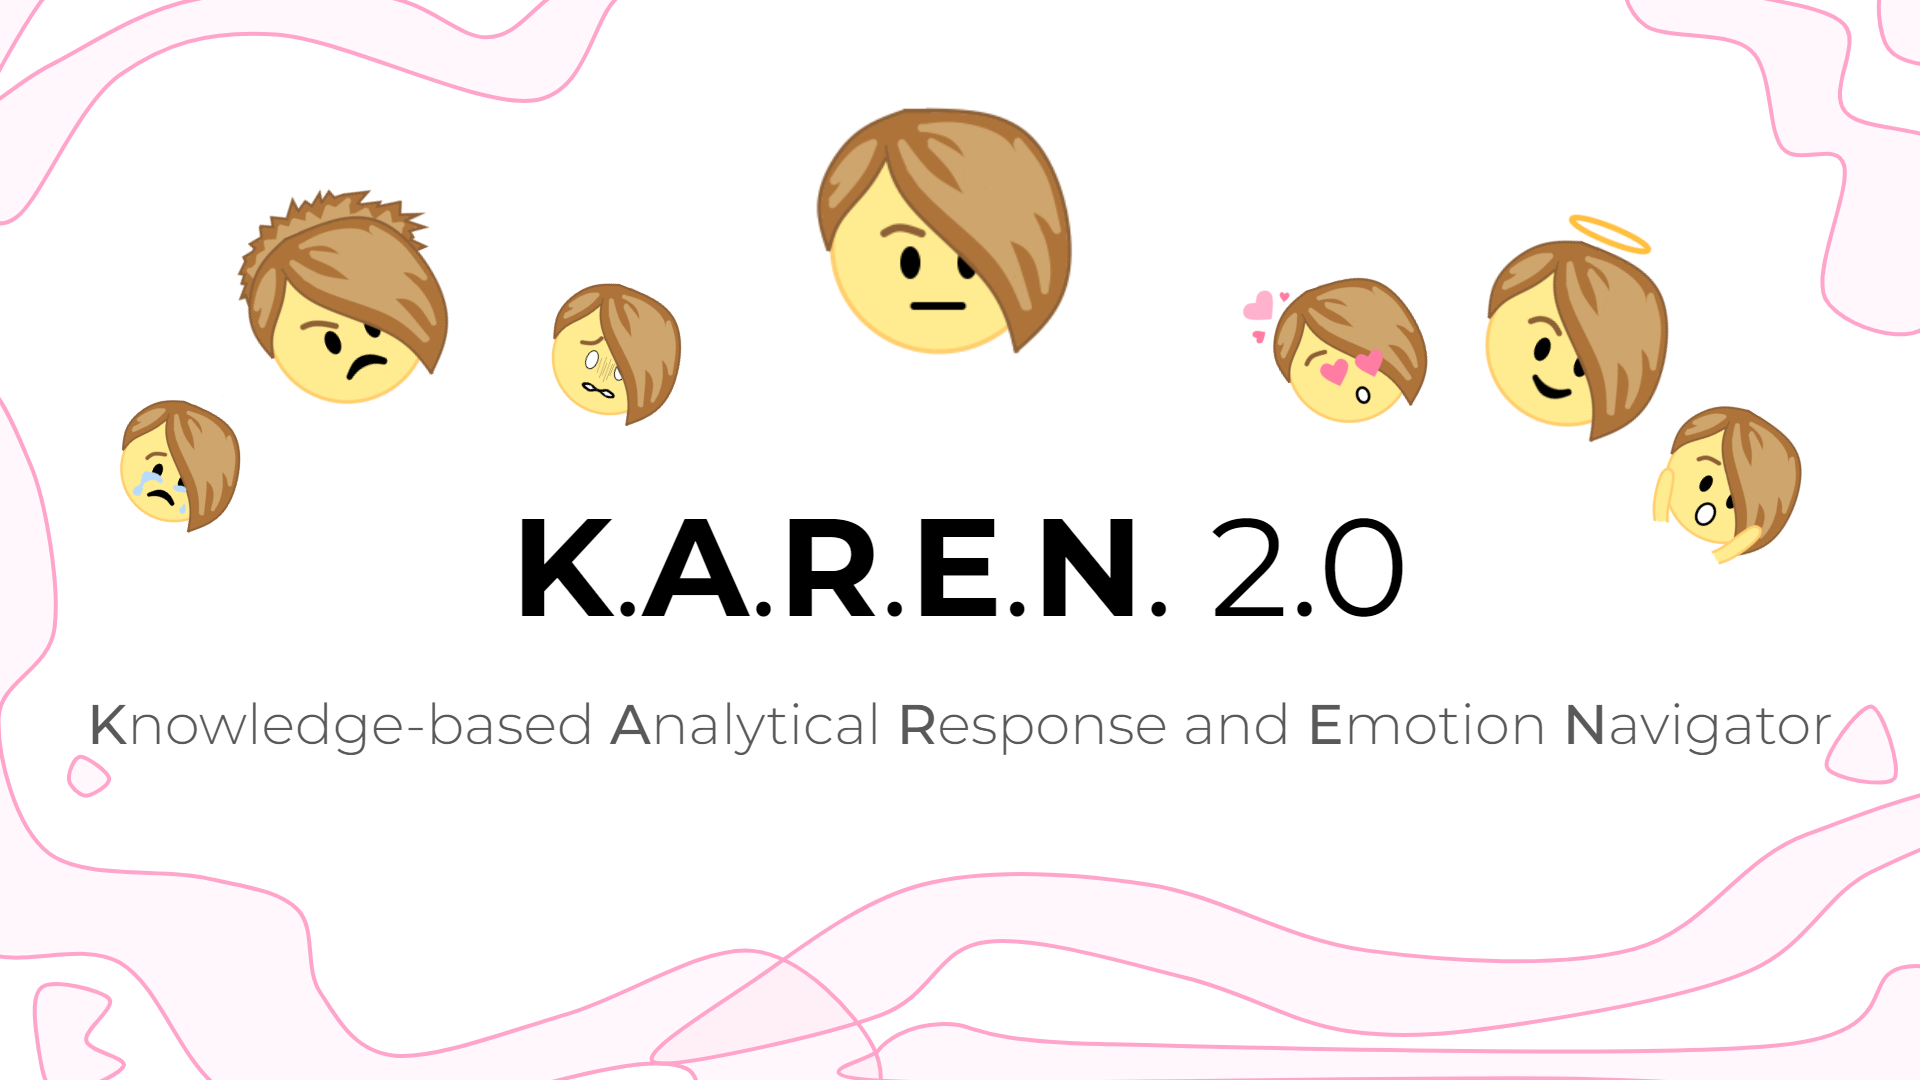

## About



Everyone sometimes has a hard time telling how the other person is feeling. There are already many applications that help with that by assessing which emotion seems something to be giving.

Example:

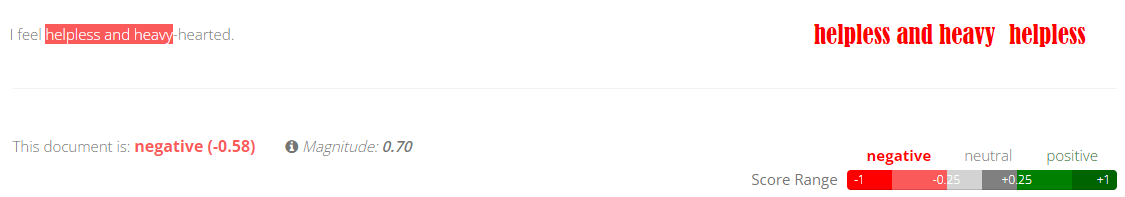

In this project I will try to perform sentimental analisys and assesment of short texts like the one above.

There will be 6 cathegories:
- sadness (0)
- joy (1)
- love (2)
- anger (3)
- fear (4)
- surprise (5)

## Getting data

In [1]:
! pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-wixuh0pu
  Running command git clone --filter=blob:none --quiet https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-wixuh0pu
  Resolved https://www.github.com/keras-team/keras-contrib.git to commit 3fc5ef709e061416f4bc8a92ca3750c824b5d2b0
  Preparing metadata (setup.py) ... done
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101055 sha256=799ad6953359f46baabb5bef46b5940d9eb37d909abd4cc6b196a59202c8b728
  Stored in directory: /tmp/pip-ephem-wheel-cache-y9rn6roy/wheels/74/d5/f7/0245af7ac33d5b0c2e095688649916e4bf9a8d6b3362a849f5
Successfully built keras-contrib


In [2]:
# Importing Packages
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
import urllib.request
import re
import nltk
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from gensim.models import Word2Vec
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout,Input,SpatialDropout1D, Bidirectional, Conv1D, GlobalMaxPooling1D, Reshape, GRU, BatchNormalization
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow import keras
from nltk.stem import WordNetLemmatizer
from imblearn.over_sampling import SMOTE
import plotly.express as px
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import string

from tensorflow.keras.preprocessing.text import Tokenizer
from keras_contrib.layers import CRF

In [3]:
!wget -O text.zip "https://raw.githubusercontent.com/senketsutsu/K.A.R.E.N.-2.0/main/data/text.zip" -q --show-progress

text.zip            100%[===================>]  15.74M  --.-KB/s    in 0.04s   


In [4]:
! unzip text.zip -d text

Archive:  text.zip
  inflating: text/text.csv           


In [151]:
df = pd.read_csv('text/text.csv',index_col=0)

In [6]:
df

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...
416804,i feel like telling these horny devils to find...,2
416805,i began to realize that when i was feeling agi...,3
416806,i feel very curious be why previous early dawn...,5
416807,i feel that becuase of the tyranical nature of...,3


## The Dataset

The dataset for this task is provided by Nidula Elgiriyewithana on kaggle.

link to the datase: https://www.kaggle.com/datasets/nelgiriyewithana/emotions/data


In [152]:
df.head(10)

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4
5,i was beginning to feel quite disheartened,0
6,i would think that whomever would be lucky eno...,2
7,i fear that they won t ever feel that deliciou...,1
8,im forever taking some time out to have a lie ...,5
9,i can still lose the weight without feeling de...,0


In [8]:
fig = px.histogram(df, x="label", width=600, height=400)
fig.update_xaxes(type='category', categoryorder='array', categoryarray= ['0','1','2','3','4','5'])
fig.show()

In [9]:
df.isna().sum()

text     0
label    0
dtype: int64

### Wordcloud

In [10]:
from wordcloud import WordCloud, STOPWORDS

In [11]:
stopwordss = set(STOPWORDS)

#### Sadness (0)


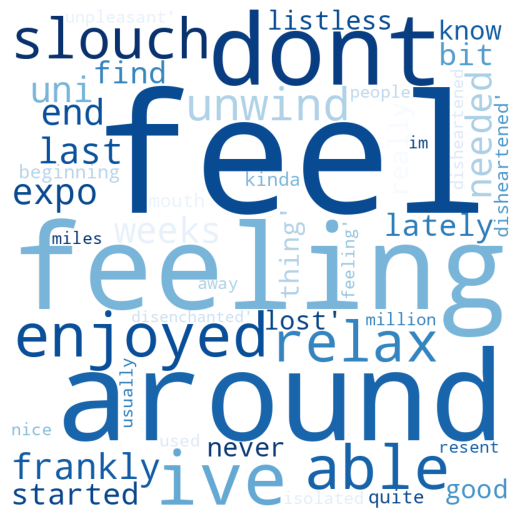

In [12]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwordss,
                min_font_size = 10,
                      colormap = 'Blues')
wordcloud.generate(str(df[df['label']==0]['text'].values))
plt.figure(figsize = (8, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

#### Joy (1)

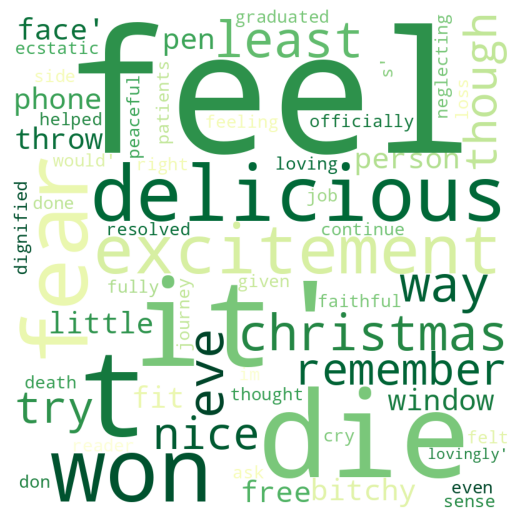

In [13]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwordss,
                min_font_size = 10,
                      colormap = 'YlGn_r')
wordcloud.generate(str(df[df['label']==1]['text'].values))
plt.figure(figsize = (8, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

#### Love (2)

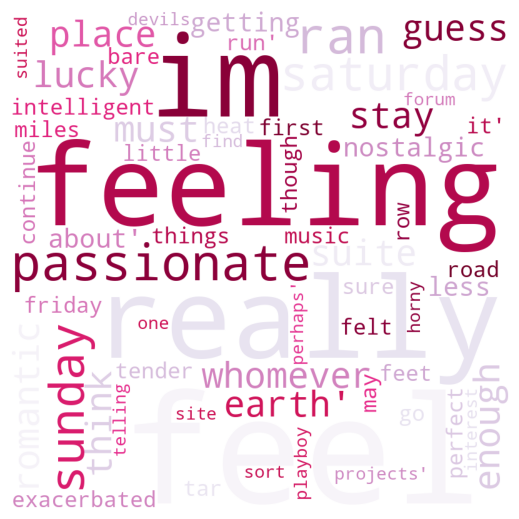

In [14]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwordss,
                min_font_size = 10,
                      colormap = 'PuRd_r')
wordcloud.generate(str(df[df['label']==2]['text'].values))
plt.figure(figsize = (8, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

#### Anger (3)

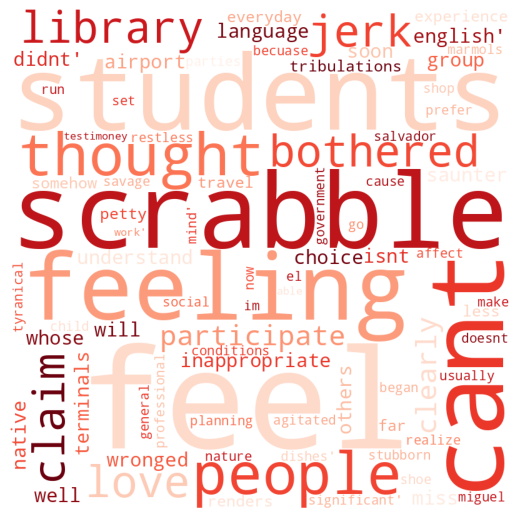

In [15]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwordss,
                min_font_size = 10,
                      colormap = 'Reds_r')
wordcloud.generate(str(df[df['label']==3]['text'].values))
plt.figure(figsize = (8, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

#### Fear (4)

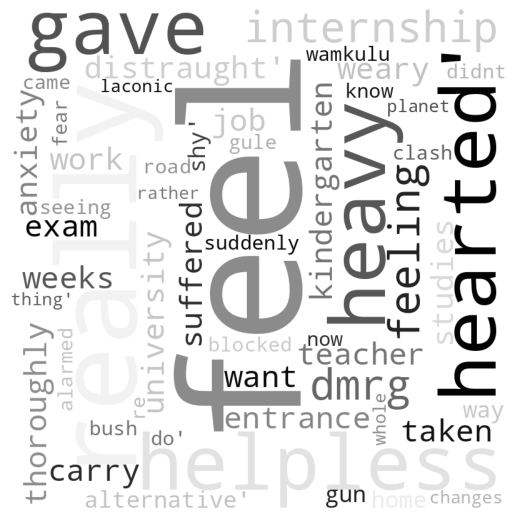

In [16]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwordss,
                min_font_size = 10,
                      colormap = 'gray')
wordcloud.generate(str(df[df['label']==4]['text'].values))
plt.figure(figsize = (8, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

#### Surprise (5)

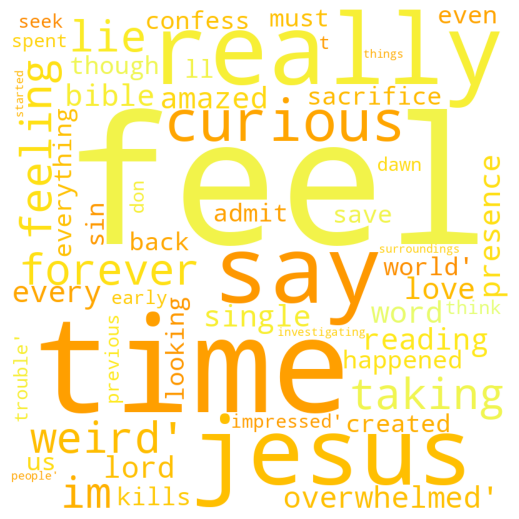

In [17]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwordss,
                min_font_size = 10,
                      colormap = 'Wistia_r')
wordcloud.generate(str(df[df['label']==5]['text'].values))
plt.figure(figsize = (8, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

#### All types

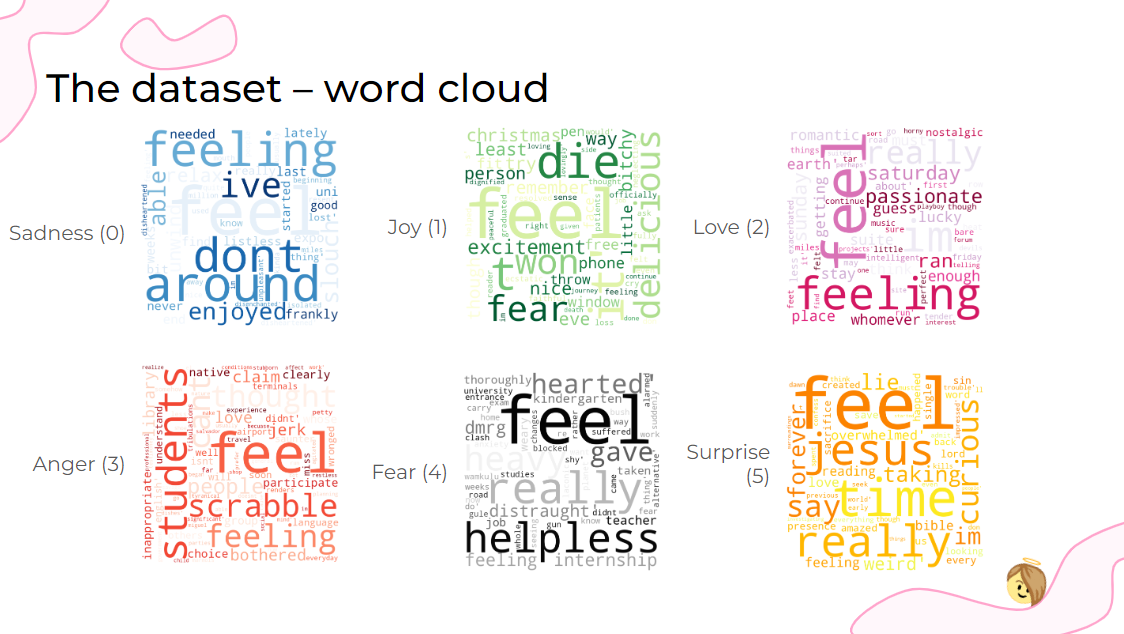

## Preprocessing

What we don't want:
- stop words
- quotes
- punctuation
- parts of html
- emojis
- URLs

In [18]:
nltk.download('punkt')
lemma = WordNetLemmatizer()
stemmer = nltk.PorterStemmer()
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [19]:
df.duplicated().sum()

686

In [20]:
df = df.drop_duplicates()

### Remove parts of the text

In [21]:
# This parts of the code was also used in the first version of KAREN

def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)


def remove_emoji(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def remove_html(text):
    html = re.compile(r'^[^ ]<.*?>|&([a-z0-9]+|#[0-9]\"\'\“{1,6}|#x[0-9a-f]{1,6});[^A-Za-z0-9]+')
    return re.sub(html, '', text)


def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

def remove_quotes(text):
    quotes = re.compile(r'[^A-Za-z0-9\s]+')
    return re.sub(quotes, '', text)


df['mod_text'] = df['text'].apply(lambda x: remove_URL(x))
df['mod_text'] = df['mod_text'].apply(lambda x: remove_emoji(x))
df['mod_text'] = df['mod_text'].apply(lambda x: remove_html(x))
df['mod_text'] = df['mod_text'].apply(lambda x: remove_punct(x))
df['mod_text'] = df['mod_text'].apply(lambda x: remove_quotes(x))
df['mod_text'] = df['mod_text'].str.lower()

### Stemming

In [22]:
def listToString(s):
    str1 = ""
    for ele in s:
        str1 += ele
    return str1

In [23]:
# Stemming
ps = PorterStemmer()
corpus = []
words = []

for i in range(0, len(df)):
    # Removing characters other than letters
    #quotes = re.compile(r'[^a-zA-Z]')
    #review = re.sub(quotes, ' ', str(df["original_text"][i]))
    review = df['mod_text'].iloc[[i]].values
    review = listToString(review)
    #print(review)
    # Lowering the case all the text
    # review = review.lower()
    # Splitting into words
    review = review.split()
    # Applying Stemming
    stemmed = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    # Joining words
    review = ' '.join(stemmed)
    # Appending all tweets to a list after preprocessing
    corpus.append(review)
    # Appending all words for word embeddings
    words.append(stemmed)

In [24]:
# Corpus sample
corpus[1:10]

['ive enjoy abl slouch relax unwind frankli need last week around end uni expo late start find feel bit listless never realli good thing',
 'gave internship dmrg feel distraught',
 'dont know feel lost',
 'kindergarten teacher thoroughli weari job taken univers entranc exam suffer anxieti week want carri work studi altern',
 'begin feel quit dishearten',
 'would think whomev would lucki enough stay suit must feel like romant place earth',
 'fear ever feel delici excit christma eve least way rememb',
 'im forev take time lie feel weird',
 'still lose weight without feel depriv']

In [25]:
print("Legth of Corpus:",len(corpus))

Legth of Corpus: 416123


In [26]:
df["clean_text"] = corpus

In [27]:
df_stemmed = df.drop(["text"],axis=1)
df_stemmed = df_stemmed.drop(["mod_text"],axis=1)

In [28]:
df_stemmed.to_csv("steemed.csv")

In [29]:
df_stemmed = pd.read_csv("/content/steemed.csv")

In [30]:
corpus = list(df_stemmed["clean_text"])

In [31]:
corpus

['feel realli helpless heavi heart',
 'ive enjoy abl slouch relax unwind frankli need last week around end uni expo late start find feel bit listless never realli good thing',
 'gave internship dmrg feel distraught',
 'dont know feel lost',
 'kindergarten teacher thoroughli weari job taken univers entranc exam suffer anxieti week want carri work studi altern',
 'begin feel quit dishearten',
 'would think whomev would lucki enough stay suit must feel like romant place earth',
 'fear ever feel delici excit christma eve least way rememb',
 'im forev take time lie feel weird',
 'still lose weight without feel depriv',
 'tri nice though get bitchi person phone window feel free littl fit throw pen face',
 'im feel littl like damag tree root littl wack',
 'offici graduat im feel ecstat thought would',
 'feel like jerk librari student claim love scrabbl cant bother particip clearli scrabbl inappropri choic group student whose nativ languag isnt english',
 'feel portfolio demonstr eager learn k

### Applying TFIDF Vectorization

In [32]:
X = df_stemmed["clean_text"].astype('str')

y=df_stemmed["label"].astype('str')

In [33]:
X

0                          feel realli helpless heavi heart
1         ive enjoy abl slouch relax unwind frankli need...
2                      gave internship dmrg feel distraught
3                                       dont know feel lost
4         kindergarten teacher thoroughli weari job take...
                                ...                        
416118    feel like tell horni devil find site suit sort...
416119    began realiz feel agit restless would thought ...
416120      feel curiou previou earli dawn time seek troubl
416121    feel becuas tyran natur govern el salvador sav...
416122    think spent time investig surround thing start...
Name: clean_text, Length: 416123, dtype: object

In [34]:
y

0         4
1         0
2         4
3         0
4         4
         ..
416118    2
416119    3
416120    5
416121    3
416122    5
Name: label, Length: 416123, dtype: object

In [35]:
y = y.replace(['0','1','2','3','4','5'],
                 ['sadness' , 'joy' , 'love' , 'anger' , 'fear' , 'surprise' ])

In [36]:
y_dummies = pd.get_dummies(y)

In [37]:
y_dummies = y_dummies.replace([True, False],[1.0,0.0])

In [38]:
y_dummies

,anger,fear,joy,love,sadness,surprise
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
416118,0.0,0.0,0.0,1.0,0.0,0.0
416119,1.0,0.0,0.0,0.0,0.0,0.0
416120,0.0,0.0,0.0,0.0,0.0,1.0
416121,1.0,0.0,0.0,0.0,0.0,0.0


## Models

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y_dummies, test_size=0.2, random_state=42, stratify=y)

In [40]:
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [41]:
maxlen = max(len(tokens) for tokens in X_train_sequences)
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post',)
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')

In [42]:
np.max(X_train_padded) + 1

46816

In [43]:
X_train_padded

array([[   1,    2,  487, ...,    0,    0,    0],
       [  99,    1,  483, ...,    0,    0,    0],
       [  27,    1,  782, ...,    0,    0,    0],
       ...,
       [  43,    1,  119, ...,    0,    0,    0],
       [  66,  118,    1, ...,    0,    0,    0],
       [   3,    1, 1069, ...,    0,    0,    0]], dtype=int32)

In [44]:
import tensorflow as tf

In [45]:
print(f"X_train_padded shape: {X_train_padded.shape}")
print(f"y_train shape: {y_train.shape}")

X_train_padded shape: (332898, 79)
y_train shape: (332898, 6)


In [153]:
pd.DataFrame(X_train_padded)

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,1,2,487,109,18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,99,1,483,897,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,27,1,782,1,10,10,3,64,201,1920,...,0,0,0,0,0,0,0,0,0,0
3,27,105,106,368,3,1,314,549,506,0,...,0,0,0,0,0,0,0,0,0,0
4,1,551,128,2690,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332893,99,133,29,1020,26,29,1,272,0,0,...,0,0,0,0,0,0,0,0,0,0
332894,168,39,14,1,47,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
332895,43,1,119,119,3543,69,557,0,0,0,...,0,0,0,0,0,0,0,0,0,0
332896,66,118,1,408,733,46813,104,1586,351,46814,...,0,0,0,0,0,0,0,0,0,0


### GRU

In [46]:
TFIDFclassifier = Sequential()
TFIDFclassifier.add(Embedding(input_dim=332898, output_dim=50, input_length=79))
TFIDFclassifier.add(Dropout(rate = 0.5))

TFIDFclassifier.add(Bidirectional(GRU(120, return_sequences=True)))
TFIDFclassifier.add(Bidirectional(GRU(64, return_sequences=True)))

TFIDFclassifier.add(Dense(units = 32, activation = 'relu'))
TFIDFclassifier.add(BatchNormalization())
TFIDFclassifier.add(Bidirectional(GRU(64)))
TFIDFclassifier.add(Dropout(rate = 0.1))
TFIDFclassifier.add(Dense(units = 6, activation = 'softmax'))

TFIDFclassifier.compile(optimizer = 'adam', loss = "mean_squared_error", metrics = ['accuracy'])



In [47]:
TFIDFclassifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 79, 50)            16644900  
                                                                 
 dropout (Dropout)           (None, 79, 50)            0         
                                                                 
 bidirectional (Bidirection  (None, 79, 240)           123840    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 79, 128)           117504    
 onal)                                                           
                                                                 
 dense (Dense)               (None, 79, 32)            4128      
                                                                 
 batch_normalization (Batch  (None, 79, 32)            1

Dzielniki	1, 2, 3, 6, 113, 226, 339, 491, 678, 982, 1473, 2946, 55483, 110966, 166449, 332898

In [97]:
history_GRU =  TFIDFclassifier.fit(X_train_padded, y_train, batch_size = 1473, epochs = 10,verbose = 1, validation_data=(X_test_padded, y_test))

Epoch 1/10
226/226 [==============================] - 36s 161ms/step - loss: 0.0135 - accuracy: 0.9328 - val_loss: 0.0156 - val_accuracy: 0.9204
Epoch 2/10
226/226 [==============================] - 38s 167ms/step - loss: 0.0133 - accuracy: 0.9332 - val_loss: 0.0157 - val_accuracy: 0.9192
Epoch 3/10
226/226 [==============================] - 39s 171ms/step - loss: 0.0132 - accuracy: 0.9337 - val_loss: 0.0155 - val_accuracy: 0.9203
Epoch 4/10
226/226 [==============================] - 36s 159ms/step - loss: 0.0130 - accuracy: 0.9343 - val_loss: 0.0155 - val_accuracy: 0.9195
Epoch 5/10
226/226 [==============================] - 39s 171ms/step - loss: 0.0129 - accuracy: 0.9346 - val_loss: 0.0156 - val_accuracy: 0.9179
Epoch 6/10
226/226 [==============================] - 38s 167ms/step - loss: 0.0128 - accuracy: 0.9349 - val_loss: 0.0160 - val_accuracy: 0.9184
Epoch 7/10
226/226 [==============================] - 38s 169ms/step - loss: 0.0127 - accuracy: 0.9357 - val_loss: 0.0156 - val_ac

In [98]:
final_preds_GRU = TFIDFclassifier.predict(X_test_padded)

2601/2601 [==============================] - 27s 10ms/step


In [99]:
final_preds_GRU

array([[3.9187232e-03, 3.8941971e-03, 1.0948402e-03, 8.7106164e-04,
        9.8970079e-01, 5.2036589e-04],
       [2.4742889e-03, 9.8752880e-01, 2.1062016e-04, 6.1061722e-04,
        3.3267823e-03, 5.8488166e-03],
       [9.9281597e-01, 1.5862967e-03, 6.0355163e-04, 1.8805071e-03,
        2.1454580e-03, 9.6813508e-04],
       ...,
       [1.2225736e-04, 2.1787793e-04, 9.8559755e-01, 1.2889780e-02,
        4.1276822e-04, 7.5976987e-04],
       [1.9894916e-04, 2.3452024e-04, 9.9312264e-01, 5.7681603e-03,
        3.8824312e-04, 2.8748057e-04],
       [4.2436160e-03, 9.8652738e-01, 6.5853115e-04, 3.8709323e-04,
        3.8703678e-03, 4.3131039e-03]], dtype=float32)

In [100]:
max_pred_GRU = np.argmax(final_preds_GRU, axis=1)

In [101]:
max_pred_GRU

array([4, 1, 0, ..., 2, 2, 1])

In [102]:
y_test_max = np.argmax(y_test, axis=1)

In [103]:
y_test_max

array([4, 1, 0, ..., 2, 2, 1])

#### Classification report

In [104]:
target_names = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']
acc_log_tfidf_GRU = accuracy_score(y_test_max,max_pred_GRU)
classification_log_tfidf_GRU = classification_report(y_test_max,max_pred_GRU, target_names=target_names)
confusion_matrix_log_tfidf_GRU = confusion_matrix(y_test_max,max_pred_GRU)


In [105]:
print(" \n Accuracy : ",acc_log_tfidf_GRU,"\n","Classification report \n",classification_log_tfidf_GRU,"\n","Confusion matrix \n",confusion_matrix_log_tfidf_GRU)

 
 Accuracy :  0.9162391108440974 
 Classification report 
               precision    recall  f1-score   support

     Sadness       0.92      0.93      0.92     11447
         Joy       0.93      0.83      0.88      9533
        Love       0.95      0.91      0.93     28156
       Anger       0.75      0.85      0.79      6899
        Fear       0.95      0.97      0.96     24198
    Surprise       0.71      0.90      0.79      2992

    accuracy                           0.92     83225
   macro avg       0.87      0.90      0.88     83225
weighted avg       0.92      0.92      0.92     83225
 
 Confusion matrix 
 [[10612   271    70    31   459     4]
 [  344  7914    58     8   427   782]
 [  100    54 25728  1844   152   278]
 [   32    20   915  5857    58    17]
 [  426    67   124   115 23452    14]
 [    9   181    71     3    37  2691]]


#### Confusion matrix

<Axes: >

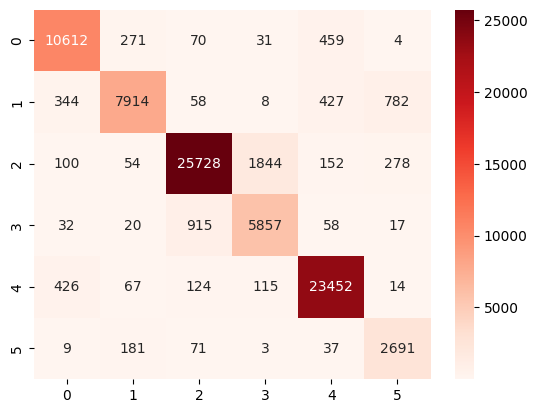

In [106]:
cm = confusion_matrix(y_test_max, max_pred_GRU)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')

#### Training and validation loss and accuracy

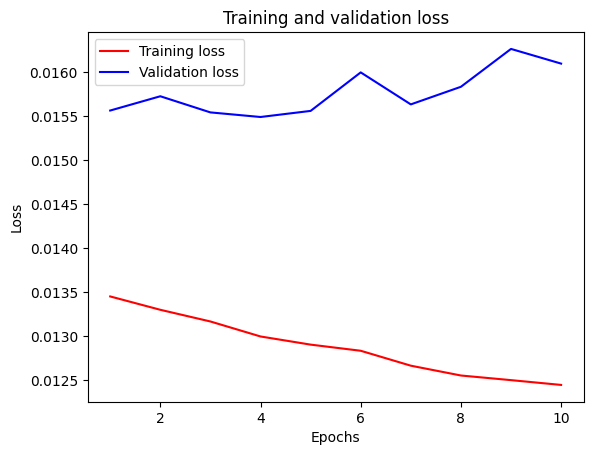

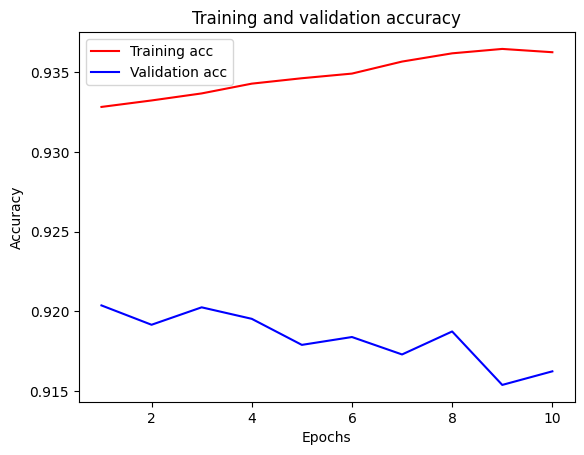

In [107]:
train_loss = history_GRU.history['loss']
val_loss = history_GRU.history['val_loss']
train_acc = history_GRU.history['accuracy']
val_acc = history_GRU.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, train_acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### LSTM

In [59]:
! pip install tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 14.2 MB/s eta 0:00:00


In [60]:
from keras.utils import to_categorical
import tensorflow_addons as tfa
from tensorflow.keras.models import Model
from keras.layers import TimeDistributed

In [61]:
LSTMclassifier = Sequential()
LSTMclassifier.add(Embedding(input_dim=332898, output_dim=50, input_length=79))
LSTMclassifier.add(Dropout(rate = 0.5))

LSTMclassifier.add(Bidirectional(LSTM(120, return_sequences=True)))
LSTMclassifier.add(Bidirectional(LSTM(64, return_sequences=True)))

LSTMclassifier.add(Dense(units = 32, activation = 'relu'))
LSTMclassifier.add(BatchNormalization())
LSTMclassifier.add(Bidirectional(LSTM(64)))
LSTMclassifier.add(Dropout(rate = 0.1))
LSTMclassifier.add(Dense(units = 6, activation = 'softmax'))

LSTMclassifier.compile(optimizer = 'adam', loss = "mean_squared_error", metrics = ['accuracy'])



In [62]:
LSTMclassifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 79, 50)            16644900  
                                                                 
 dropout_2 (Dropout)         (None, 79, 50)            0         
                                                                 
 bidirectional_3 (Bidirecti  (None, 79, 240)           164160    
 onal)                                                           
                                                                 
 bidirectional_4 (Bidirecti  (None, 79, 128)           156160    
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 79, 32)            4128      
                                                                 
 batch_normalization_1 (Bat  (None, 79, 32)           

In [63]:
history = LSTMclassifier.fit(X_train_padded, y_train, batch_size=113, epochs=10, verbose=1, validation_data=(X_test_padded, y_test))

Epoch 1/10
2946/2946 [==============================] - 149s 47ms/step - loss: 0.0290 - accuracy: 0.8694 - val_loss: 0.0157 - val_accuracy: 0.9209
Epoch 2/10
2946/2946 [==============================] - 104s 35ms/step - loss: 0.0165 - accuracy: 0.9198 - val_loss: 0.0150 - val_accuracy: 0.9230
Epoch 3/10
2946/2946 [==============================] - 105s 36ms/step - loss: 0.0155 - accuracy: 0.9231 - val_loss: 0.0148 - val_accuracy: 0.9253
Epoch 4/10
2946/2946 [==============================] - 104s 35ms/step - loss: 0.0149 - accuracy: 0.9258 - val_loss: 0.0146 - val_accuracy: 0.9254
Epoch 5/10
2946/2946 [==============================] - 101s 34ms/step - loss: 0.0144 - accuracy: 0.9275 - val_loss: 0.0143 - val_accuracy: 0.9275
Epoch 6/10
2946/2946 [==============================] - 100s 34ms/step - loss: 0.0140 - accuracy: 0.9289 - val_loss: 0.0143 - val_accuracy: 0.9272
Epoch 7/10
2946/2946 [==============================] - 103s 35ms/step - loss: 0.0137 - accuracy: 0.9302 - val_loss: 0

In [64]:
final_preds = LSTMclassifier.predict(X_test_padded)

2601/2601 [==============================] - 31s 11ms/step


In [65]:
max_pred = np.argmax(final_preds, axis=1)

In [66]:
max_pred

array([4, 1, 0, ..., 2, 2, 1])

In [67]:
y_test_max = np.argmax(y_test, axis=1)

In [68]:
y_test_max

array([4, 1, 0, ..., 2, 2, 1])

#### Classification report

In [125]:
target_names = ['anger',	'fear',	'joy',	'love',	'sadness',	'surprise']
acc_log_tfidf = accuracy_score(y_test_max,max_pred)
classification_log_tfidf = classification_report(y_test_max,max_pred, target_names=target_names)
confusion_matrix_log_tfidf = confusion_matrix(y_test_max,max_pred)


In [126]:
print(" \n Accuracy : ",acc_log_tfidf,"\n","Classification report \n",classification_log_tfidf,"\n","Confusion matrix \n",confusion_matrix_log_tfidf)

 
 Accuracy :  0.9266085911685191 
 Classification report 
               precision    recall  f1-score   support

       anger       0.90      0.97      0.94     11447
        fear       0.94      0.85      0.89      9533
         joy       0.93      0.96      0.94     28156
        love       0.88      0.71      0.79      6899
     sadness       0.97      0.96      0.97     24198
    surprise       0.77      0.85      0.81      2992

    accuracy                           0.93     83225
   macro avg       0.90      0.89      0.89     83225
weighted avg       0.93      0.93      0.93     83225
 
 Confusion matrix 
 [[11146    75    87    13   124     2]
 [  456  8090    67     8   425   487]
 [   90    51 27056   574   135   250]
 [   32    21  1835  4932    61    18]
 [  598    58   136    59 23340     7]
 [   10   341    47     1    40  2553]]


#### Confusion matrix

<Axes: >

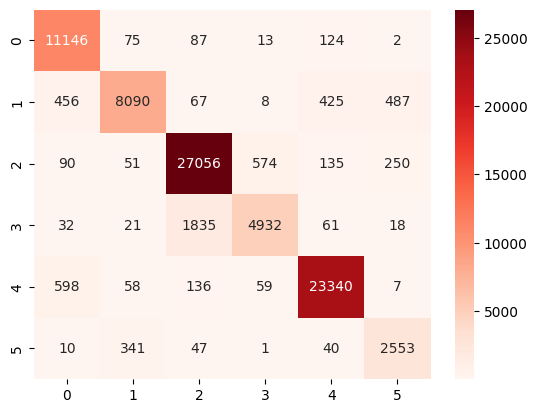

In [72]:
cm = confusion_matrix(y_test_max, max_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')

#### Training and validation loss and accuracy

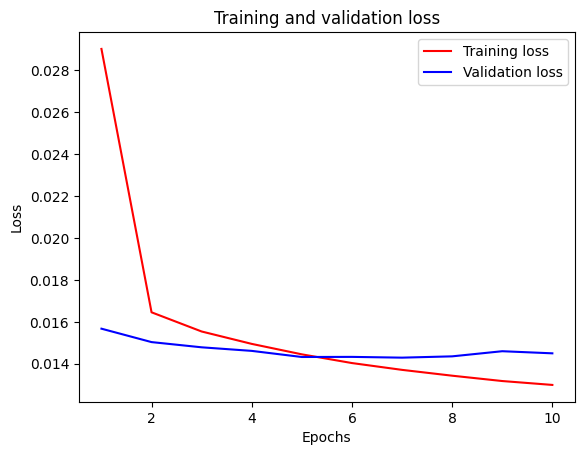

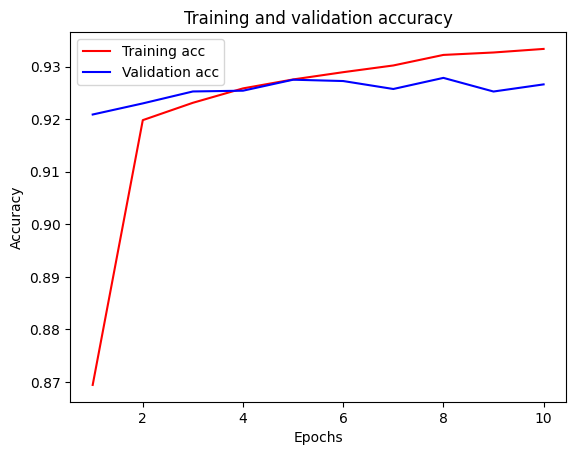

In [73]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, train_acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Mismatched

#### All predictions

In [108]:
all_pred = pd.DataFrame(X_test)
all_pred['true'] = y_test_max
all_pred['GRU'] = max_pred_GRU
all_pred['LSTM'] = max_pred
df_no_dup = df.drop_duplicates(subset=['clean_text'], keep='first')
all_pred = pd.merge(all_pred, df_no_dup[['clean_text', 'text']], on='clean_text', how='left')

In [109]:
all_pred

,clean_text,true,GRU,LSTM,text
0,danc keith slip whoever told wear ballerena sl...,4,4,4,i was dancing with keith and i slipped whoever...
1,tri new thing feel vulner yet still share work,1,1,1,i try new things feel vulnerable yet still sha...
2,feel bitchi form,0,0,0,i feel bitchy form that
3,feel amaz thing god,5,5,5,i feel the amazing things god is doing
4,wake saturday morn feel excit get spend entir ...,2,2,2,i wake up on saturday mornings feeling excited...
...,...,...,...,...,...
83220,know probabl weird church occasion weigh anxie...,0,0,0,i know that s probably weird but churches occa...
83221,want around could feel creativ energi flow,2,2,2,i want to be around and i could feel the creat...
83222,feel privileg close love relationship imagin l...,2,2,2,i feel privileged to have such a close and lov...
83223,feel quit posit thing unfold futur though id l...,2,2,2,i feel quite positive about how things will un...


#### GRU and LSTM both wrong

In [120]:
mismatched = all_pred[((all_pred['true']!=all_pred['GRU']) & (all_pred['true']!=all_pred['LSTM']))]

In [121]:
mismatched = mismatched.replace([0,1,2,3,4,5],
                 ['anger',	'fear',	'joy',	'love',	'sadness',	'surprise' ])
mismatched

,clean_text,true,GRU,LSTM,text
33,id realli prefer didnt grow feel weird,fear,surprise,surprise,id really prefer if they didnt grow up feeling...
41,ive yet tick feel ive fulli enjoy game without...,joy,love,love,ive yet to tick off but i feel that ive fully ...
104,tire unresourc state feel overwhelm,fear,surprise,surprise,i am tired or in an unresourceful state i feel...
124,feel like support use game like piraci game il...,joy,love,love,i feel like supporting used games are like pir...
149,love weight lift much better feel result reall...,anger,sadness,sadness,i have loved the weight lifting and how much b...
...,...,...,...,...,...
83018,find posit feel helpless,fear,sadness,sadness,i find myself in this position feeling helpless
83071,alreadi feel like im tortur,fear,anger,anger,i already feel like im being tortured by not h...
83118,alway feel anguish lose friend want know word ...,joy,sadness,sadness,i will always feel the anguish of losing my fr...
83127,feel weve pain struggl way long hideou winter ...,sadness,love,love,i feel weve pained and struggled our way throu...


In [122]:
mismatched_same = mismatched[mismatched['GRU']==mismatched['LSTM']]
mismatched_diff = mismatched[mismatched['GRU']!=mismatched['LSTM']]

In [123]:
mismatched_same

,clean_text,true,GRU,LSTM,text
33,id realli prefer didnt grow feel weird,fear,surprise,surprise,id really prefer if they didnt grow up feeling...
41,ive yet tick feel ive fulli enjoy game without...,joy,love,love,ive yet to tick off but i feel that ive fully ...
104,tire unresourc state feel overwhelm,fear,surprise,surprise,i am tired or in an unresourceful state i feel...
124,feel like support use game like piraci game il...,joy,love,love,i feel like supporting used games are like pir...
149,love weight lift much better feel result reall...,anger,sadness,sadness,i have loved the weight lifting and how much b...
...,...,...,...,...,...
83018,find posit feel helpless,fear,sadness,sadness,i find myself in this position feeling helpless
83071,alreadi feel like im tortur,fear,anger,anger,i already feel like im being tortured by not h...
83118,alway feel anguish lose friend want know word ...,joy,sadness,sadness,i will always feel the anguish of losing my fr...
83127,feel weve pain struggl way long hideou winter ...,sadness,love,love,i feel weve pained and struggled our way throu...


In [124]:
mismatched_diff

,clean_text,true,GRU,LSTM,text
599,close friend appli tiss admiss last year,sadness,joy,anger,my close friend and i applied to tiss for admi...
1480,accident see friend compromis situat stranger,anger,sadness,joy,accidentally seeing a friend in a compromising...
1549,feel stress learn accept seem like way get thi...,anger,joy,sadness,i feel stressed because of this but i ve learn...
2313,heard last regul socialist govren concern pension,sadness,joy,fear,when i heard the last regulation of the social...
2381,wait mark difficult subject,fear,anger,joy,waiting for my marks in a difficult subject
...,...,...,...,...,...
80344,summer job,anger,sadness,joy,at my summer job
80820,conflict parent possibl interrupt studi,fear,anger,joy,because of a conflict with my parents there wa...
80884,feel like point see trainspot part ovp hope fi...,joy,anger,sadness,i feel like at some point i will see trainspot...
81619,feel strang emot,sadness,surprise,fear,i feel strangely emotional


#### Which types are mismached the most

In [142]:
mismatched_grouped = (
    mismatched.groupby(['true', 'GRU', 'LSTM'])['text']
    .count()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
    .head(10)
)

mismatched_grouped


,true,GRU,LSTM,count
52,love,joy,joy,846
39,joy,love,love,554
29,fear,surprise,surprise,469
24,fear,sadness,sadness,406
59,sadness,anger,anger,386
14,fear,anger,anger,309
44,joy,surprise,surprise,248
76,surprise,fear,fear,118
42,joy,sadness,sadness,94
12,anger,sadness,sadness,91


##### Examples

In [147]:
for _, row in mismatched_grouped.iterrows():
  true_value = row['true']
  GRU_value = row['GRU']
  LSTM_value = row['LSTM']
  print(f"True: {true_value}, GRU: {GRU_value}, LSTM: {LSTM_value}")
  print(mismatched.loc[
      (mismatched['true'] == row['true']) &
      (mismatched['GRU'] == row['GRU']) &
      (mismatched['LSTM'] == row['LSTM'])
  ].head(1)['text'].values)



True: love, GRU: joy, LSTM: joy
['i mean i guess creativity could be even more of a broad categorie that beauty fits into but i ll talk about beauty for now since it s something i feel passionate about']
True: joy, GRU: love, LSTM: love
['ive yet to tick off but i feel that ive fully enjoyed the game without needing to scrape the sweet but crusty residue out of the bottom']
True: fear, GRU: surprise, LSTM: surprise
['id really prefer if they didnt grow up feeling weird about you']
True: fear, GRU: sadness, LSTM: sadness
['i feel a bit helpless and its not a nice feeling']
True: sadness, GRU: anger, LSTM: anger
['i will always feel hated for nothing in my control and i will always want that control thinking its all my fault im hated']
True: fear, GRU: anger, LSTM: anger
['i dont think i can handle this tonight im hiding in my room feeling sooo agitated']
True: joy, GRU: surprise, LSTM: surprise
['i have no plans for the future and i feel amazing']
True: surprise, GRU: fear, LSTM: fear
[

#### All instances where GRU and LSTM do not agree

In [149]:
notmatched = all_pred[((all_pred['LSTM']!=all_pred['GRU']))]
notmatched

,clean_text,true,GRU,LSTM,text
19,read alway touch feel bless,3,3,2,i read these i am always very touched and feel...
35,know profession obvious fine without also know...,1,5,1,i know they re professionals they ll obviously...
53,im feel particularli fear love quot,1,1,3,im not feeling particularly fearful but i love...
66,im snuggl afghan bibl lap feel prais rise insi...,3,3,2,im snuggled into an afghan with my bible in my...
117,im go write book worth damn im lazi graduat sc...,2,3,2,im not going to write a book worth a damn and ...
...,...,...,...,...,...
83131,push overdr cover feel inadequaci complet igno...,4,3,4,i pushed myself into overdrive to cover up fee...
83169,often feel spirit ach long rememb feel reach g...,4,3,4,i often feel my spirit aching and longing to r...
83184,could realli feel much hate dream,4,4,0,i could really feel how much i hated him in th...
83194,left outsid feel total stress take roz away,0,4,0,i left them outside and was feeling totally st...
